# Exercise 1
## Folding a paper
NOTE: Due to time analasys problem (the two methods are too fast, i had to result to using Decimal class and very big fold count to get even minimum time difference)

In [1]:
from decimal import *
def folded_paper_thickness_expo(times_folded, init_thickness):
    return Decimal(init_thickness) * Decimal(2)** Decimal(times_folded)

def print_paper_thickness(fold_function,fold_times):
    THICKNESS = 0.00008
    print('Thickness after folded {} times is: {}'.format(fold_times,fold_function(fold_times,THICKNESS)))
def test_exercise_1():
    print('Test by exponent function!')
    print_paper_thickness(folded_paper_thickness_expo,43)

#TEST
test_exercise_1()

Test by exponent function!
Thickness after folded 43 times is: 703687441.7766400575637817383


# Excercise 2
## Converting meter to kilometer

In [2]:
def convert_to_kilometer(meter):
    return meter/1000
def test_excercise_2():
    fold_times = 43
    THICKNESS = 0.00008
    thickness = folded_paper_thickness_expo(fold_times,THICKNESS)
    print('{} folds thickness in meter: {}'.format(fold_times, thickness))
    print('{} folds thickness in kilometer: {:.2f}'.format(fold_times, convert_to_kilometer(thickness)))

#TEST
test_excercise_2()

43 folds thickness in meter: 703687441.7766400575637817383
43 folds thickness in kilometer: 703687.44


## Distance to the moon is 384.400 Km
So our paper got to the moon surely after 43 folds (not considering it's height and width)

# Excercise 3
## Calculate the same thicknees through for loop

In [3]:
def folded_paper_thickness_for(times_folded, init_thickness):
    thickness = Decimal(init_thickness)
    for i in range(1,times_folded+1):
        thickness *= Decimal(2)
    return thickness
def test_exercise_3():
    print('Test by ilterative loop!')
    print_paper_thickness(folded_paper_thickness_for,43)

#TEST
test_exercise_3()

Test by ilterative loop!
Thickness after folded 43 times is: 703687441.7766400575637817384


# Excercise 4
## Compare the two calculation methods

In [4]:
from time import time

def execution_time_wrapper(inner_function):
    def func(*arg):
        init_time = time()
        value = inner_function(*arg)
        elapsed_time = time() - init_time
        return elapsed_time
    return func
def test_excercise_4():
    f1 = execution_time_wrapper(folded_paper_thickness_expo)
    f2 = execution_time_wrapper(folded_paper_thickness_for)
    
    THICKNESS= 0.00008
    times_fold = 3000000

    expo_time = f1(times_fold, THICKNESS)
    for_time = f2(times_fold, THICKNESS)
    print('For folding {} times, exponent function takes {:.20f}s, for loop function takes {:.20f}s, difference is {:.20f}s'.format(times_fold,expo_time,for_time,expo_time-for_time))

#TEST
test_excercise_4()
    

For folding 3000000 times, exponent function takes 0.00000000000000000000s, for loop function takes 0.97699213027954101562s, difference is -0.97699213027954101562s


Result of comparision: exponent function is significantly faster. But result only show for very big value of folds. (Decimal class is used)

## Using The magic time statistic calculation command to show time difference instead

In [5]:
%%timeit
THICKNESS=0.00008
fold_times = 3000000
folded_paper_thickness_expo(fold_times,THICKNESS)

3.7 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%%timeit
THICKNESS=0.00008
fold_times = 3000000
folded_paper_thickness_for(fold_times,THICKNESS)

776 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Excercise 5
## Save calculated values to a list


In [10]:
def list_fold_thickness(folds, init_thickness):
    thicks = list()
    thicks.append(init_thickness)

    for i in range(1,folds + 1):
        thicks.append(thicks[i-1]*2)

    return thicks
lst = list_fold_thickness(43,0.00008)
print('Final list len: ', len(lst))
print(lst)

Final list len:  44
[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]


# Excercise 6
## Plotting

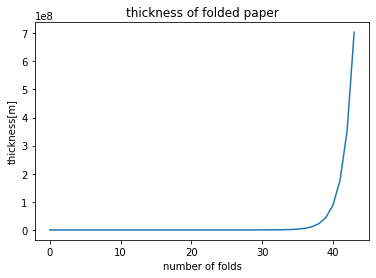

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(list_fold_thickness(43,0.00008)) # Enter the variable name of the list in "List name"
plt.show()

From the graph above, it can be seen that the thickness is increasing exponentially.
But, here, due to the coefficient 0.00008 as the init thickness, the "exponent" growth is held down and quite slow at the start.

# Excercise 7
## Custom graph

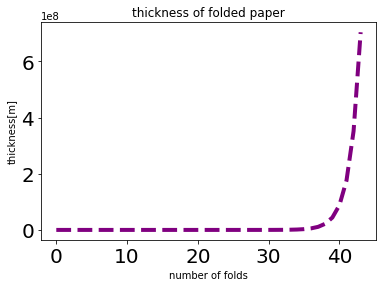

In [9]:
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(list_fold_thickness(43,0.00008), color='purple',linewidth = 4, linestyle = 'dashed')
plt.rcParams.update({'font.size':10})
plt.tick_params(labelsize=20) # Make settings related to axis values
plt.show()